In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def fetch_dataset(url):
    df = pd.read_csv(url)
    return df

dataset_url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = fetch_dataset(dataset_url)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
def split_data(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = split_data(df, 'species')

In [4]:
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

X_train, X_test, scaler = scale_features(X_train, X_test)

In [5]:
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)

In [6]:
def make_predictions(model, X_test):
    return model.predict(X_test)

y_pred = make_predictions(model, X_test)

In [7]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%\n")
    print(classification_report(y_test, y_pred))
    return accuracy

accuracy = evaluate_model(y_test, y_pred)

Model Accuracy: 100.00%

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



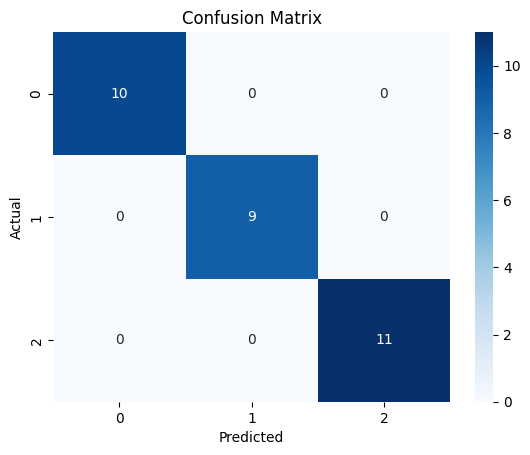

In [8]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

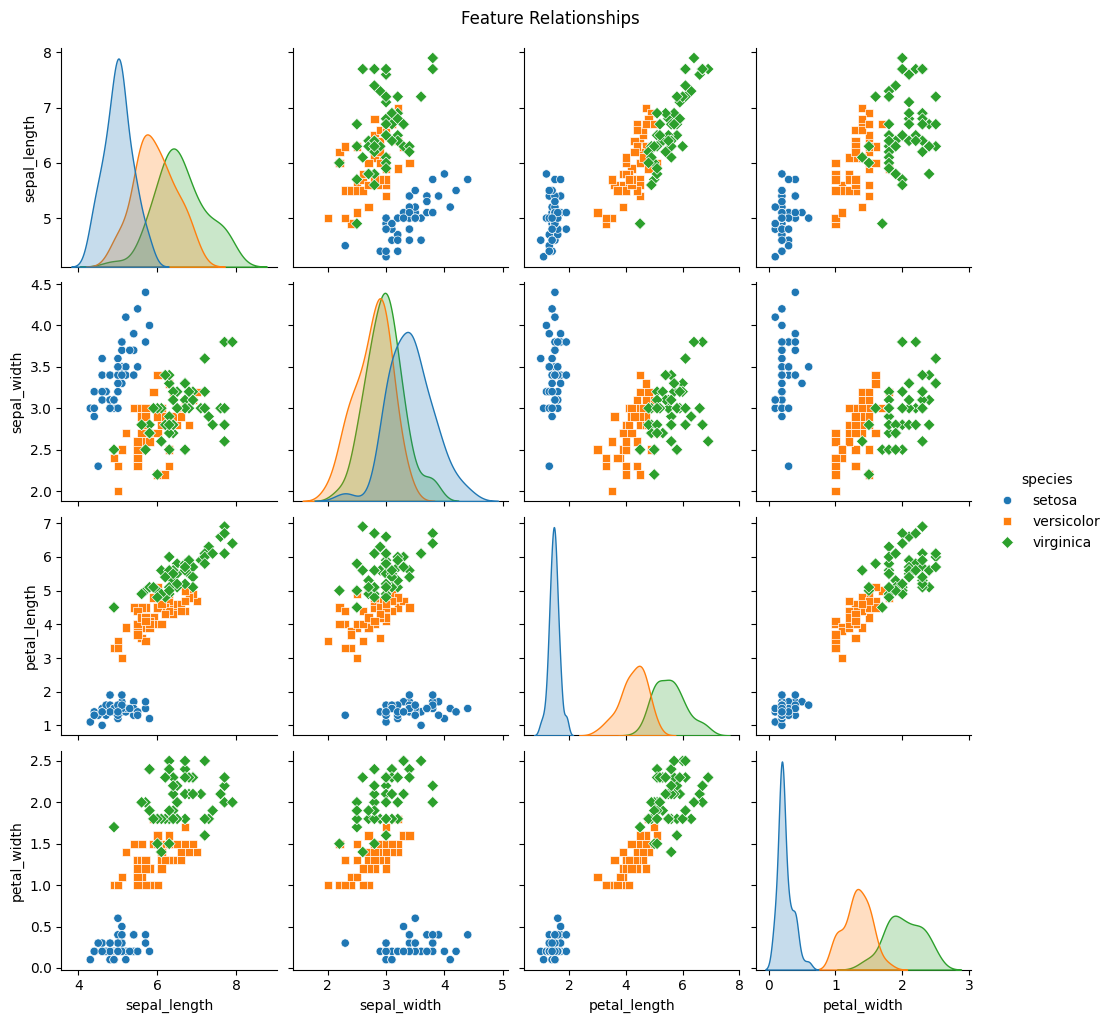

In [9]:
def plot_feature_relationships(df, target_column):
    sns.pairplot(df, hue=target_column, markers=["o", "s", "D"])
    plt.suptitle("Feature Relationships", y=1.02)
    plt.show()

plot_feature_relationships(df, 'species')

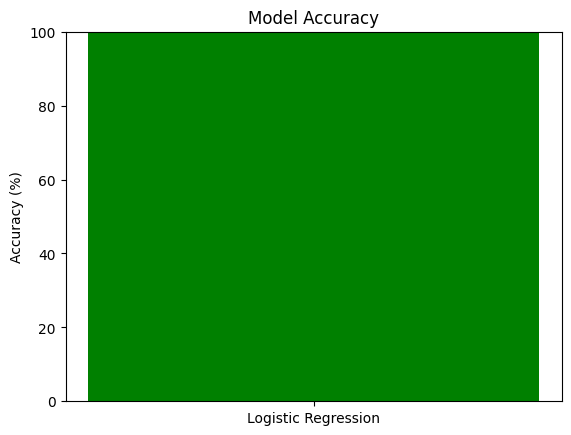

In [10]:
def plot_accuracy_chart(accuracy):
    plt.bar(['Logistic Regression'], [accuracy * 100], color='green')
    plt.ylabel('Accuracy (%)')
    plt.ylim(0, 100)
    plt.title('Model Accuracy')
    plt.show()

plot_accuracy_chart(accuracy)

In [11]:
def predict_single_flower(model, scaler, feature_values):
    sample_scaled = scaler.transform([feature_values])
    prediction = model.predict(sample_scaled)[0]
    print(f"Predicted Species: {prediction}")

predict_single_flower(model, scaler, [5.1, 3.5, 1.4, 0.2])

Predicted Species: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


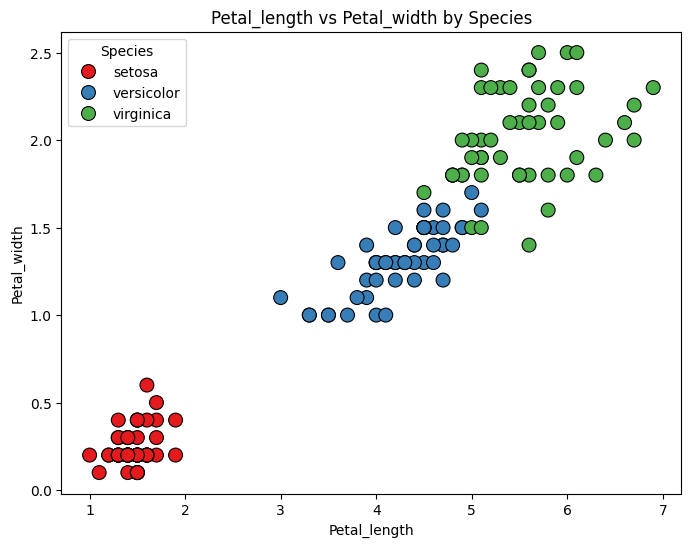

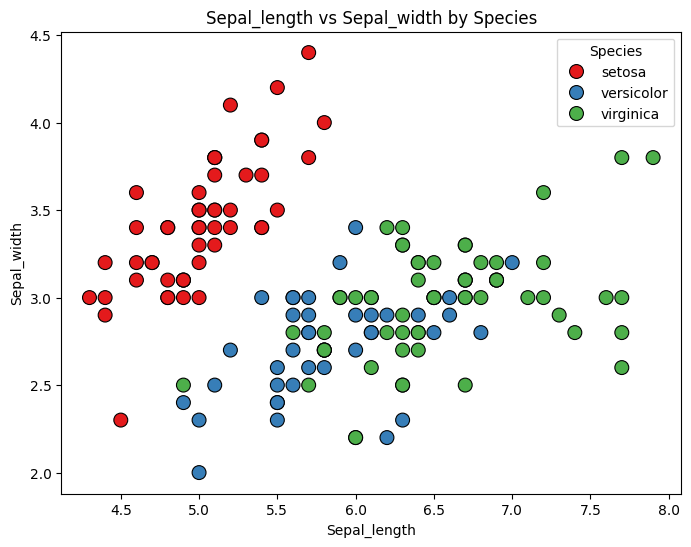

In [12]:
def plot_flower_distribution(df, x_feature='petal_length', y_feature='petal_width', target_column='species'):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x_feature, y=y_feature, hue=target_column, palette='Set1', s=100, edgecolor='k')
    plt.title(f"{x_feature.capitalize()} vs {y_feature.capitalize()} by {target_column.capitalize()}")
    plt.xlabel(x_feature.capitalize())
    plt.ylabel(y_feature.capitalize())
    plt.legend(title=target_column.capitalize())
    plt.show()

plot_flower_distribution(df, 'petal_length', 'petal_width', 'species')
plot_flower_distribution(df, 'sepal_length', 'sepal_width', 'species')